# Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

1. read data
2. clean data

### Read Data

In [2]:
# list all files in Analysis folder
files = os.listdir('Analysis')
files.remove('wrangler_digit_span_log.xlsx')
print(files)

['wager_digit_span_log.csv', 'werbler_digit_span_log.csv', 'wobbler_digit_span_log.csv', 'wraight_digit_span_log.csv']


In [3]:
# create empty dataframe
df_merged_main = pd.DataFrame()

# loop through all files in Analysis folder and merge them into one dataframe
for file in files:
    df = pd.read_csv('Analysis/' + file, dtype=str)
    df_merged_main = pd.concat([df_merged_main, df], ignore_index=True)

# format csv dates to datetime objects
df_merged_main['date'] = pd.to_datetime(df_merged_main['date'], dayfirst=True)
df_merged_main['date'] = df_merged_main['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

df_wrangler = pd.read_excel('Analysis/wrangler_digit_span_log.xlsx', dtype=str)

df_merged_main = pd.concat([df_merged_main, df_wrangler], ignore_index=True)

In [4]:
df_merged_main.head(30)

,user_name,date,time,session_nr,loop_nr,presented_sequence,recalled_sequence,outcome,mistakes_in_a_row,recall_time_in_s,...,session_time,time_between_digits,memory_method,tiredness,physical_activity,mental_state,motivation,location,session_mode,feedback
0,wager,2023-11-23 00:00:00,08:53:50,1,1,121,121,correct,0,5.197617769241333,...,00:00:08,0.0,11,5,0,6,7,5,3,NaN
1,wager,2023-11-23 00:00:00,08:54:05,1,2,8409,8349,incorrect,1,3.437217950820923,...,00:00:23,0.0,11,5,0,6,7,5,3,NaN
2,wager,2023-11-23 00:00:00,08:54:26,1,3,7125,7125,correct,0,9.537040948867798,...,00:00:44,0.0,11,5,0,6,7,5,3,NaN
3,wager,2023-11-23 00:00:00,08:54:42,1,4,64692,64692,correct,0,3.8744049072265625,...,00:01:00,0.0,11,5,0,6,7,5,3,NaN
4,wager,2023-11-23 00:00:00,08:54:59,1,5,61352,16352,incorrect,1,5.897935152053833,...,00:01:17,0.0,11,5,0,6,7,5,3,NaN
5,wager,2023-11-23 00:00:00,08:55:20,1,6,794200,794200,correct,0,5.841115236282349,...,00:01:38,0.0,11,5,0,6,7,5,3,NaN
6,wager,2023-11-23 00:00:00,08:55:44,1,7,3581037,3158017,incorrect,1,11.848827123641968,...,00:02:02,0.0,11,5,0,6,7,5,3,NaN
7,wager,2023-11-23 00:00:00,08:56:05,1,8,9476268,7929023,incorrect,2,9.237361907958984,...,00:02:22,0.0,11,5,0,6,7,5,3,NaN
8,wager,2023-11-23 00:00:00,08:56:28,1,9,692614,692914,incorrect,3,9.18989396095276,...,00:02:46,0.0,11,5,0,6,7,5,3,NaN
9,wager,2023-11-23 00:00:00,08:56:41,1,10,89008,89008,correct,0,3.8415448665618896,...,00:02:58,0.0,11,5,0,6,7,5,3,NaN


In [5]:
df_merged_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_name            3134 non-null   object
 1   date                 2839 non-null   object
 2   time                 2839 non-null   object
 3   session_nr           2839 non-null   object
 4   loop_nr              2839 non-null   object
 5   presented_sequence   2839 non-null   object
 6   recalled_sequence    2556 non-null   object
 7   outcome              2839 non-null   object
 8   mistakes_in_a_row    2839 non-null   object
 9   recall_time_in_s     2839 non-null   object
 10  sound_model          2839 non-null   object
 11  digit_length         2839 non-null   object
 12  session_time         2839 non-null   object
 13  time_between_digits  2839 non-null   object
 14  memory_method        2732 non-null   object
 15  tiredness            2839 non-null   object
 16  physic

### Data Cleaning

In [10]:
# dropna in digit_length column
df_merged_main = df_merged_main.dropna(subset=['digit_length'])

# format digit_length as int
df_merged_main['digit_length'] = df_merged_main['digit_length'].astype(int)

# format session_mode as int
df_merged_main['session_mode'] = df_merged_main['session_mode'].astype(int)

# drop column feedback
df_merged_main = df_merged_main.drop(columns=['feedback'])

In [11]:
df_merged_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2839 entries, 0 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_name            2839 non-null   object
 1   date                 2839 non-null   object
 2   time                 2839 non-null   object
 3   session_nr           2839 non-null   object
 4   loop_nr              2839 non-null   object
 5   presented_sequence   2839 non-null   object
 6   recalled_sequence    2556 non-null   object
 7   outcome              2839 non-null   object
 8   mistakes_in_a_row    2839 non-null   object
 9   recall_time_in_s     2839 non-null   object
 10  sound_model          2839 non-null   object
 11  digit_length         2839 non-null   int32 
 12  session_time         2839 non-null   object
 13  time_between_digits  2839 non-null   object
 14  memory_method        2732 non-null   object
 15  tiredness            2839 non-null   object
 16  physical_ac

# Data Analysis

1. base test results

### Base Test Results

In [7]:
df_baseline = df_merged_main[df_merged_main['session_mode'] == 3]


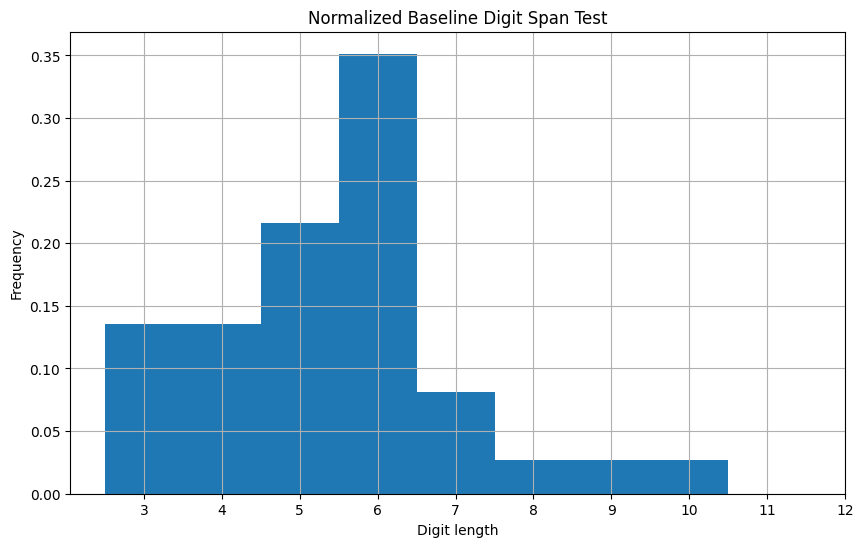

In [8]:
# plot histogram of baseline using plt in range of 1 to 14
plt.figure(figsize=(10, 6))

# normalize to 1 and where outcome is correct
plt.hist(df_baseline[df_baseline['outcome'] == 'correct']['digit_length'], bins=range(3, 13), density=True)

plt.title('Normalized Baseline Digit Span Test')
plt.xlabel('Digit length')
plt.ylabel('Frequency')

# move x tick labels to center of bars
plt.xticks([i + 0.5 for i in range(3, 13)], [i for i in range(3, 13)])

plt.grid(True)

plt.show()